# Fitting

- determine parameters of a function to find best description of data
- best description defined by global maximum (or minimum) of a goodness-of-fit criterion
- many possibilities; one often used in quantitative analysis is $\chi^2$
- $\chi^2 = \sum_i^N \frac{(x_i - e_i)^2}{\sigma^2}$
- $x_i$ are the data points, $e_i$ are the function or model predictions, $\sigma_i$ are the uncertainties for point $i$

__Example:__

- let's say we are measuring kinetic energy $E_{kin}$, which depends on mass $m$ and velocity $v$:
- $E_{kin} = \frac{1}{2} m v^2$

y_true =  [0.5, 2.0, 4.5, 8.0, 12.5, 18.0, 24.5, 32.0]


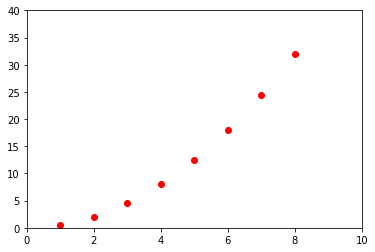

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def Ekin(v, m = 1.0):
        return 0.5*m*v**2

x = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0]
y_true = []
for i in range(len(x)):
    xx = float(x[i])
    y_true.append(Ekin(xx))

print("y_true = ", y_true)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x,y_true,"ro")
ax.set_xbound(0,10)
ax.set_ybound(0,40)
plt.show()
    

Ok, let's say our measurement has 20% uncertainty

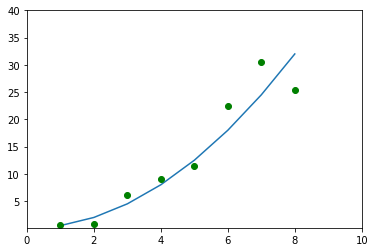

In [3]:
y_obs = []
for i in range(len(x)):
    err = np.random.normal(1,0.2)
    y = Ekin(x[i]) * err
    y_obs.append(y)

#print("x = ", x)
#print("y_true = ", y_true)
#print("y_obs = ", y_obs)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x,y_true,"-")
plt.plot(x,y_obs,"go")
ax.set_xbound(0,10)
ax.set_ybound(0.1,40)
ax.set_yscale("linear")

plt.show()
    


This will be much easier to understand if we add "error bars"

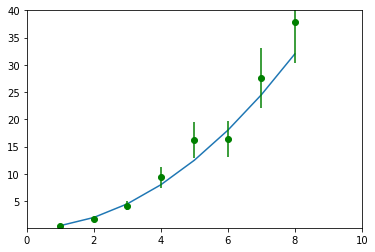

In [13]:
y_obs = []
y_err = []

for i in range(len(x)):
    err = np.random.normal(1,0.2)
    y = Ekin(x[i]) * err
    y_obs.append(y)
    y_err.append(y * 0.2)

#print("x = ", x)
#print("y_true = ", y_true)
#print("y_obs = ", y_obs)
#print("y_obs = ", y_err)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x,y_true,"-")
plt.errorbar(x,y_obs,yerr=y_err,fmt='go')

ax.set_xbound(0,10)
ax.set_ybound(0.1,40)
#ax.set_yscale("log")

plt.show()
    

Now we can for example calculate the $\chi^2$ between the observerd points (with fluctuations/uncertainty)

In [14]:
def calc_chi2(x,x_err,e):
    if(len(x) != len(e) or len(x) != len(x_err)):
        print("calc_chi2: Input lists do not have same length")
        return
    chi2 = 0.0
    for i in range(len(x)):
        chi2 += (x[i] - e[i])**2/x_err[i]**2
    return chi2

chi2 = calc_chi2(y_obs, y_err, y_true)
print("Chi2 is ",chi2,"for ",len(y_obs),"degrees of freedom")
        
        

Chi2 is  4.932113121454178 for  8 degrees of freedom


- Ok, now let's do some fitting
- assume we measure $E_kin$ for different velocities, but we don't know the mass
- fit a function to the observed data to extract the mass from the measurement
- use curve_fit from scipy.optimize to perform the fit

In [2]:
from scipy.optimize import curve_fit

y_true = []
y_obs = []
y_err = []
x = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0]


mass = np.random.rand()+0.1
print("true mass is", '{:.2f}'.format(mass))
for i in range(len(x)):
    y = Ekin(x[i],mass)
    y_true.append(y)
    
for i in range(len(x)):
    err = np.random.normal(1,0.2)
    y = Ekin(x[i],mass) * err
    y_obs.append(y)
    y_err.append(y * 0.2)
    
popt, pcov = curve_fit(Ekin, x, y_obs, sigma=y_err,p0 = [1],absolute_sigma=True)
perr = np.sqrt(np.diag(pcov))
mass_fit = popt[0]
mass_err = perr[0]
print("fitted mass = ", '{:.2f}'.format(mass_fit))
print("uncertainty = ", '{:.2f}'.format(mass_err))

y_fit = []
for i in range(len(x)):
    y_fit.append(Ekin(x[i],mass_fit))

chi2 = calc_chi2(y_obs, y_err, y_fit)
print("Chi2 is ",'{:.2f}'.format(chi2),"for ",len(y_obs) - 1,"degrees of freedom")

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x,y_true,"-",label = 'True')
plt.errorbar(x,y_obs,yerr=y_err,fmt='go', label = 'observed')
xx = np.arange(x[0],x[-1],0.1)

plt.plot(xx, Ekin(xx, *popt), label='fit')

ax.set_xbound(0,10)
ax.set_ybound(0.1,40)
ax.set_yscale("log")
ax.set_xlabel("Velocity")
ax.set_ylabel("Kinetic energy")

ax.legend(loc='upper left')
plt.show()
    

NameError: name 'np' is not defined

- for this particular example, we could also make our life easier by using the build-in polyfit from numpy
- let's see how this works and also come back to the discussion of overfitting

[0.3810422315228477, 2.643492146771595, 4.775971884335469, 7.990207788299956, 9.979838763298014, 18.423077114192, 29.641115058760725, 35.44274721043629]
parameters of polynomial =  [ 0.02258887  0.43078694 -0.41841027  0.89806946]
xx =  [1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3
 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1
 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]


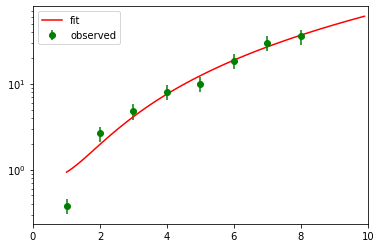

In [18]:

x = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0]
y_obs = []  
y_err = []
for i in range(len(x)):
    err = np.random.normal(1,0.2)
    y = Ekin(x[i],mass) * err
    y_obs.append(y)
    y_err.append(y*0.2)
    
z = np.polyfit(x, y_obs, 3)
print(y_obs)
print("parameters of polynomial = ",z)

p = np.poly1d(z)

fig = plt.figure()
ax = fig.add_subplot(111)

plt.errorbar(x,y_obs,yerr=y_err,fmt='go', label = 'observed')

xx = np.arange(x[0],x[-1]+2,0.1)
print("xx = ", xx)
plt.plot(xx, p(xx),'r-', label='fit')

ax.set_xbound(0,10)
ax.set_ybound(0.1,40)
ax.set_yscale("log")

ax.legend(loc='upper left')
plt.show()

In [1]:
## from scipy.optimize import curve_fit
import matplotlib.pylab as plt
import skimage
import numpy as np

#define a Gaussian function with 3 parameters, max, position, sigma
def gauss(x,a, x0, sigma):
   return a*np.exp(-(x-x0)**2/(2*sigma**2))

# Generate a sample data file with Gaussian distribution random data

# Open file
f = open("gaus.txt","w")

# Generate Gaussian data points
x = np.random.normal(100,20,5000)

#Write points to file and close file
print("Write",len(x),"data points")
for i in range(len(x)):
    f.write(str(i)+","+str(x[i])+"\n")
f.close

# now read the sample data file
   
f = open("gaus.txt","r")

# Will store the input values in data[]
data = []

# Read from data file until nothing is returned by readline()
flag = True
while flag:
    s = f.readline()
    if s:
        ss = s.split(",")
        data.append(float(ss[1]))
    else:
        # reached end of file; stop while loop
        flag = False

print("Read",len(data),"data points")
# close data file
f.close

# Create matplotlib figure
fig = plt.figure(figsize = (8,8))
fig.add_subplot(111)
# change size of tick labels (numbers) from too-small default
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14

# set parameters for histogram
nbins =50
xmin = 0
xmax = 200

#plot data as 'step' (line) histogram with green line
plt.hist(data,nbins,histtype='step',range=[xmin,xmax],color = 'g')

# histogram the data and get the bin counts ("yval") and bin edges ("edges")
yval, edges = np.histogram(data,nbins, range=[xmin,xmax])

#calculate the bin centers ("xval") and count errors ("yerror")
xval = np.empty(nbins)
yerror = np.empty(nbins)
for i in range(nbins):
    xval[i] = (edges[i]+edges[i+1])/2
    yerror[i] = np.sqrt(yval[i])

# plot the same histogram, but with markers and y errorbars
plt.errorbar(xval,yval,yerr=yerror,fmt='ro',label='Data')

# calculate starting parameters for the Gaussian fit
par = np.empty(3)
par[0] = np.amax(yval) # height
par[1] = np.average(data) #mean
par[2] = np.std(data) #sigma

print("Starting parameters for Gaussian fit = ",par)

# perform Gaussian fit, returning fitted values ("popt") and covariance matrix ("pcov")
popt, pcov = curve_fit(gauss, xval, yval,p0 = par)

# get parameter errors as sqrt of diagonal of covariance matrix
perr = np.sqrt(np.diag(pcov))

print("Fitted parameters = ",popt)
print("Uncertainties = ",perr)

# plot Gaussian with fitted parameters
xx = np.arange(xmin,xmax,0.1)
plt.plot(xx, gauss(xx, *popt),'b',label="Gaussian fit")

# set labels and font size
plt.xlabel(r'Data value', fontsize = 18)
plt.ylabel(r'No of events per bin', fontsize = 18)
plt.legend(fontsize = 'xx-large')
plt.tight_layout()         # Automatically set the margins to fit everything
plt.savefig("myplot.pdf")
plt.show()

ModuleNotFoundError: No module named 'matplotlib'